# Sheet 4

In [11]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import fsolve

/var/folders/kq/0f1vjrnj2xn0q3t1270kq05r0000gn/T/ipykernel_14101/2177377824.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Task 1. Fixed Points, Stability, and Bifurcations

### Find the fixed points of the system. Visualize these in a graph. Are they stable?

In [2]:
w = 7
def model(x, theta = -2.5):
    return(w * 1 / (1 + np.exp(- x)) + theta)

We find the fixpoint(s) using fsolve from scipy

In [3]:
f = lambda x: x - model(x)
fixpoint = fsolve(f, x0 = 3)
print(fixpoint)

[4.41647135]


We plot the univariate nonlinear map along with the identity line in the below plot

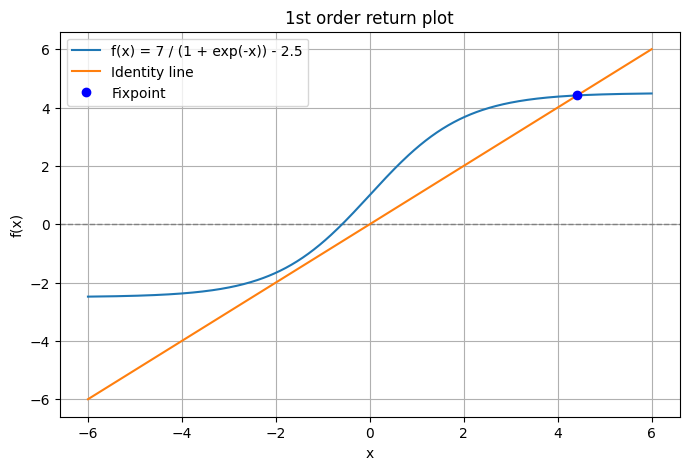

In [4]:
x_vals = np.linspace(-6, 6, 400)
y_vals = model(x_vals)

# Plotting
plt.figure(figsize=(8, 5))
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # horizontal line at y=0
plt.plot(x_vals, y_vals, label=f"f(x) = {w} / (1 + exp(-x)) - 2.5")
plt.plot(range(-6,7), range(-6,7), label=f"Identity line")
plt.plot(fixpoint, model(fixpoint), 'o', color='blue', label="Fixpoint")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("1st order return plot")
plt.legend()
plt.grid(True)
plt.show()

The fixpoint is stable (at least locally). No matter the initial value it seems that the system will converge to the fixpoint. This is seen by following the cobweb obtained by starting at a $x_0$. Furthermore the derivative of the recursive model defining the system is given by
$$f'(x_t) = \frac{w}{\exp(x_t)+\exp(-x_t) + 2}$$
And we know that the fixpoint is locally stable as long as the derivative in the point is smaller than 1 - which is the case for the fixpoint found above. 

In [5]:
w / (np.exp(fixpoint)+np.exp(-fixpoint) + 2)

array([0.08253193])

### For $w = 7$, plot the bifurcation graph as a function of $\theta \in [−10, 0]$. Include both stable and unstable objects. How does the system change its dynamical properties as $\theta$ is varied within this range

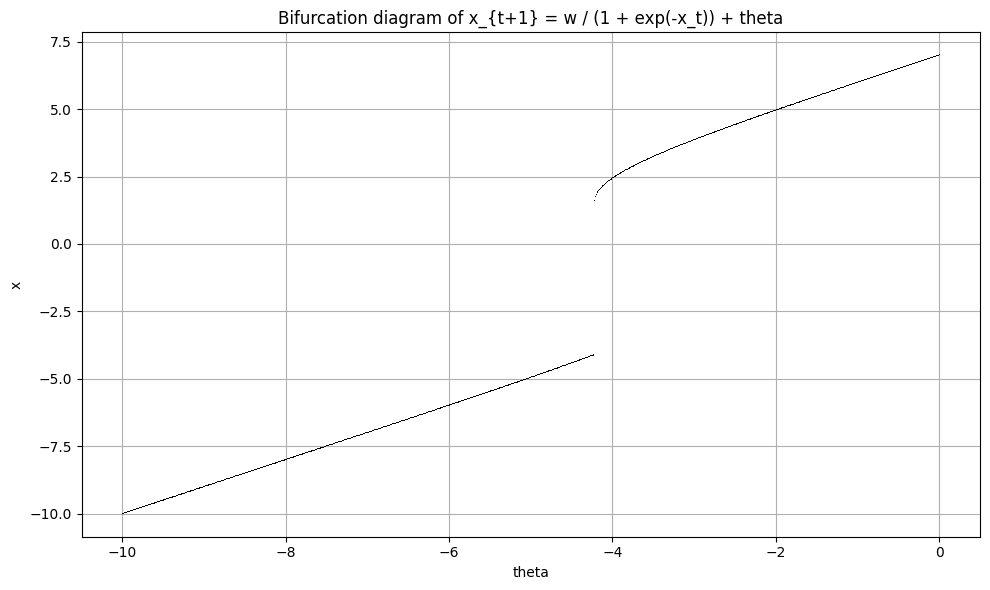

In [7]:
theta_vals = np.linspace(-10, 0, 1000)
n_transient = 300                # discard these iterations
n_iter = 1000                    # plot these iterations after transient

# Prepare figure
plt.figure(figsize=(10, 6))

# Loop over theta values
for theta in theta_vals:
    x = 4  # initial condition
    # Iterate to get close to attractor
    for _ in range(n_transient):
        x = w / (1 + np.exp(-x)) + theta
    # Now plot the remaining iterations
    x_vals = []
    for _ in range(n_iter):
        x = w / (1 + np.exp(-x)) + theta
        x_vals.append(x)
    # Plot points: one vertical line of x-values for this theta
    plt.plot([theta]*n_iter, x_vals, ',k', alpha=0.3)

# Labels and show
plt.title("Bifurcation diagram of x_{t+1} = w / (1 + exp(-x_t)) + theta")
plt.xlabel("theta")
plt.ylabel("x")
plt.grid(True)
plt.tight_layout()
plt.show()


## The logistic map

### Prove that, for $0 \leq x_n \leq 1$ and $0 \leq r \leq 4$, we have $0 \leq f(x_n) \leq 1$

$f(x_n)$ is defined as
$$f(x_n) = rx_n(1-x_n) = r (x_n - x_n^2)$$
Note that $x_n \in [0,1] \Rightarrow x_n^2 \leq x_n$. Therefore we have $x_n - x_n^2 \geq 0$ and $r \geq 0$ implying 
$$f(x_n) = r (x_n - x_n^2) \geq 0$$
Establishing the lwoer bound. For the upper bound note that the function $0 \leq x_n - x_n^2$ for $x_n \in [0,1]$ is concave and has an optimum in $x_n = 0.5$ thus
$$f(x_n) = r (x_n - x_n^2) \leq r \cdot 0.5 \leq 4 \cdot 0.25 = 1$$

## Starting from some $x_1 \in (0, 1)$, plot a cobweb plot for $r = 0.5, 1.5, 2.5, 3.5$ and $3.9$ with $30$ steps

In [36]:
def log_map(r,x): 
    return(r * x * (1 - x))

In [38]:
num_iterations = 60
rs = [0.5, 1.5, 2.5, 3.5, 3.9]
x = np.empty((num_iterations, len(rs)))
x[0,:] = 0.2
i = -1
for i, r in enumerate(rs):
    for n in range(0, num_iterations - 1):
        if n % 2 == 0:
            x[n + 1, i] = r * x[n, i] * (1 - x[n, i])
        else: 
            x[n + 1, i] = x[n, i]

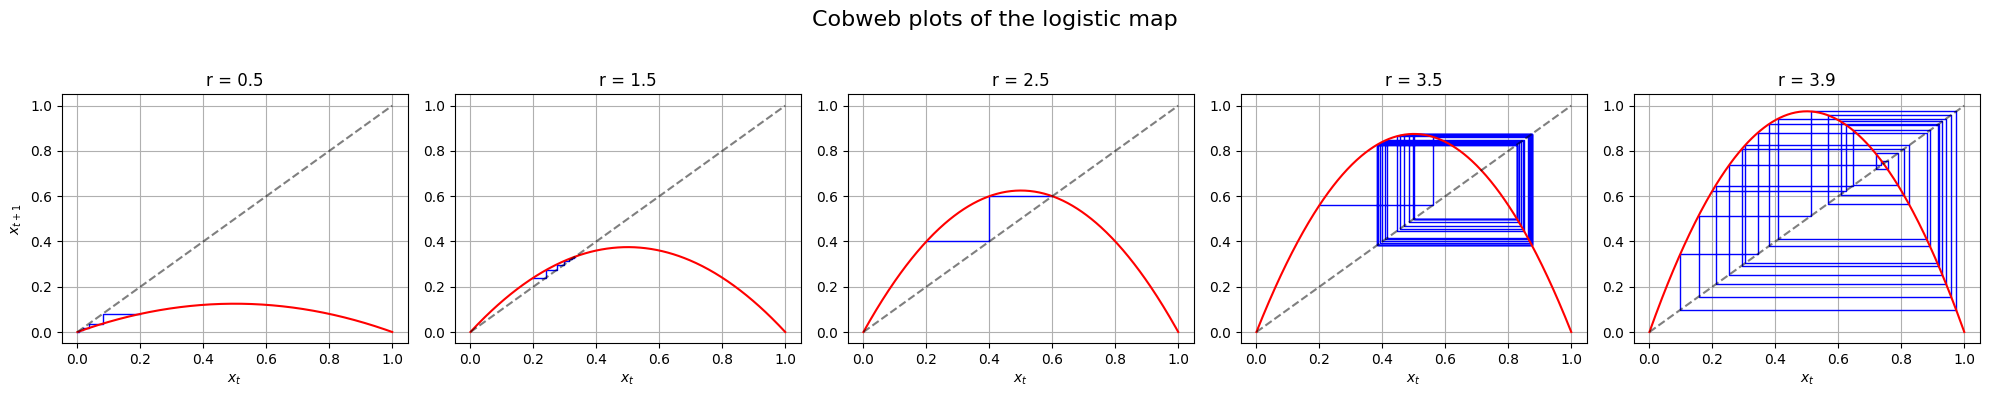

In [39]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
x_vals = np.linspace(0, 1, 400)

for i, ax in enumerate(axes):
    r = rs[i]
    # Plot the cobweb line
    ax.plot(x[0:num_iterations-2, i], x[1:num_iterations-1, i], color='blue', lw=1)
    
    # Plot f(x) = r*x*(1-x)
    ax.plot(x_vals, r * x_vals * (1 - x_vals), 'r', label=f'$f(x) = {r}x(1 - x)$')
    
    # Identity line
    ax.plot(x_vals, x_vals, 'k--', alpha=0.5)
    
    ax.set_title(f"r = {r}")
    ax.set_xlabel("$x_t$")
    if i == 0:
        ax.set_ylabel("$x_{t+1}$")
    ax.grid(True)

fig.suptitle("Cobweb plots of the logistic map", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Show that the logistic map has a cycle of order 2 for r > 3. Use that a 2-cycle requires f (q) = p and f (p) = q. What is stability of the 2-cycle? Does the stability change for some r > 3?

Let $f(q) = p$ and $f(p) = q$. This implies 
$$rq(1-q) = p$$
and 
$$rp(1-p) = q$$
Substituting the expression for $q$ into the expression of $p$ we obtain
$$r^2p(1-p)(1-rp(1-p)) = p$$
Which is equivalent to
$$-rp^3 + 2rp^2 - (1+r) p + 1 - 1/r^2 = 0$$
Which is a cubic equation. The cubic equation always has at least one real solution, implying that there is always 2-cycle for the logistic map, and specifically for $r > 3$. We can find the solutions by help of python. Below we define the a function to find the solutions of the equation and a function for computing the discriminant. If the discriminant is positive there are 3 solutions, if it is negative there is only 1. 

In [106]:
def cubic_eq(r):
    # Coefficients of the cubic: ax^3 + bx^2 + cx + d = 0
    coeffs = [-r, 2*r, -(1+r), 1-1/(r*r)]
    
    roots = np.roots(coeffs)
    return(roots)

def disc(r):
    a,b,c,d = -r, 2*r, -(1+r), 1-1/(r*r)
    return(18*a*b*c*d - 4*b*b*b*d + b*b*c*c-4*a*c*c*c-27*a*a*d*d)


We illustrate with an example

In [107]:
disc(3.5)

0.045918367346928335

So there are three real solutions to the equation. 

In [108]:
cubic_eq(3.5)

array([0.85714286, 0.71428571, 0.42857143])

We check that these indeed are 2-cycles. The first number gives us:

In [109]:
p1 = 0.85714286
q1 = log_map(3.5, p1)

print(max(abs(log_map(3.5, p1) - q1), abs(log_map(3.5, q1) - p1)))
print([p1, q1])

6.428571452943288e-09
[0.85714286, 0.4285714214285715]


So the point is 0.85714286 indeed part of a two cycle. The second point 0.42857143 is another one of the solutions to the cubic equation. We consider the last point

In [110]:
p2 = 0.71428571
print(log_map(3.5, p2))

0.7142857207142856


This is actually a fixpoint, which of course is than also a two cycle. 

Let the logistic map be denoted by $f$. We can check the stability of the 2-cycle points by finding the derivative of the function $f(f(x))$ and calculating it in the points. 

$$ \frac{df(f(x))}{dx} = -4r^3x^3 + 6r^3 x^2 - 2(r^2+r^3)x + r^2$$

In [111]:
def deriv_log_map(r,x):
    return(-4* r ** 3 * x ** 3 + 6 * r ** 3 * x ** 2 - 2 * (r ** 2 + r ** 3) * x + r ** 2)

We calculate these for our previous example

In [112]:
print(deriv_log_map(3.5, p1))
print(deriv_log_map(3.5, p2))

-1.2500001350000076
2.250000022500018


So neither of the two cycle points are stable. 

In order to check whether the stability changes for certain r values, we for a range of r values calculate the 2 cycle points and find the derivatives in these points. 

In [158]:
r_vals = np.linspace(3.00001, 5, 2000)
cycle_points = [cubic_eq(r) for r in r_vals]
deriv_vals = np.empty(shape = (2000, 3))
for i in range(2000):
    for j in range(3):
        deriv_vals[i,j] = deriv_log_map(r_vals[i], cycle_points[i][j])

We plot the results

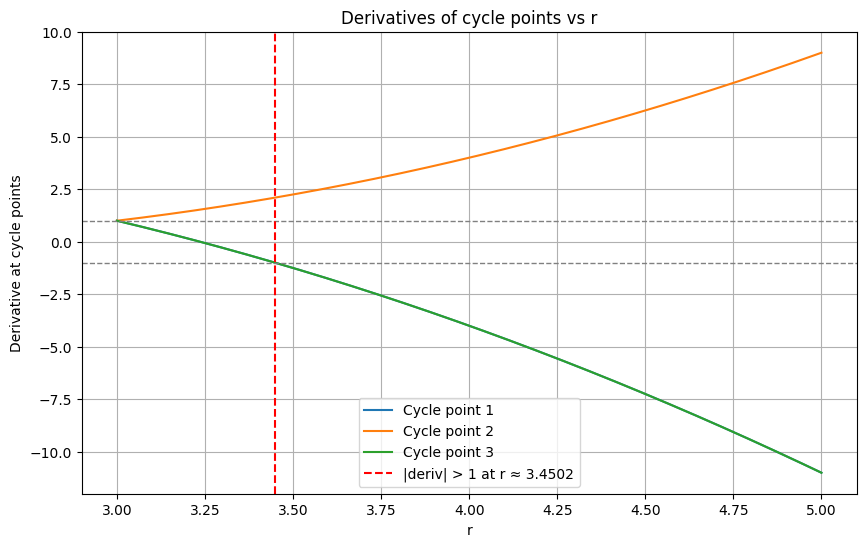

In [159]:
exceed_index = np.where(np.abs(deriv_vals[:,0]) > 1)[0][0]
r_exceed = r_vals[exceed_index]

# Plotting
plt.figure(figsize=(10, 6))

for j in range(3):
    plt.plot(r_vals, deriv_vals[:, j], label=f'Cycle point {j+1}')

plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=-1, color='gray', linestyle='--', linewidth=1)

# Vertical line at the r where |deriv| > 1
if r_exceed is not None:
    plt.axvline(x=r_exceed, color='red', linestyle='--', label=f'|deriv| > 1 at r ≈ {r_exceed:.4f}')

# Final plot settings
plt.xlabel('r')
plt.ylabel("Derivative at cycle points")
plt.title("Derivatives of cycle points vs r")
plt.legend()
plt.grid(True)
plt.show()

One of the points is always unstable. And the stability of the other two cycle is lost as soon as r > 3.4502.

### For each $ r \in \{0.001, 0.002, 0.003 . . . 3.998, 3.999\}$, produce $1000$ trajectories starting at random initial conditions with $100$ steps. Plot only the endpoints of the trajectories according to their respective $r$ in a 2D-scatter plot. 

In [ ]:
r_vals = np.linspace(0.001, 3.999, 3999)
results = 

for r_val in r_vals:
    for i range(1000):
        x1 = np.random.uniform()

[0.001 0.002 0.003 0.004]
